# Regression Problem

In [1]:
# importing libraries
import pandas as pd                  # for reading,selecting and manipulating the data
import numpy as np                   # For mathematical calculations
from datetime import datetime
from datetime import date
import calendar
import matplotlib.pyplot as plt
import seaborn as sn                 # For plotting graphs
import seaborn as sns 
%matplotlib inline

In [3]:
#reading the dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
#seeing top 5 rows of train dataset 
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [5]:
#dimension of train dataset
train.shape

(12980, 12)

In [6]:
#seeing name of variables
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [7]:
#identifying continuous and categorical
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [8]:
#dimension of test dataset
test.shape

(4399, 11)

In [9]:
#seeing name of the test dataset
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [10]:
#seeing top 5 rows of test dataset 
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


# Univariate Analysis

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

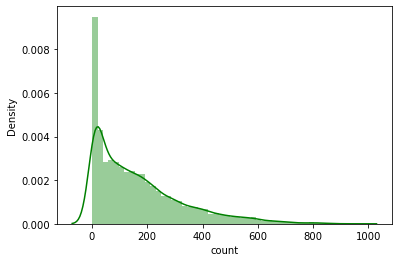

In [11]:
# for univariate continuous variables using graphical method to get distribution of count variable
#To represents the overall distribution of continuous data variables by using distplot function
#data distribution of a "count" variable against the density distribution
sn.distplot(train['count'], color="green")


<AxesSubplot:ylabel='Frequency'>

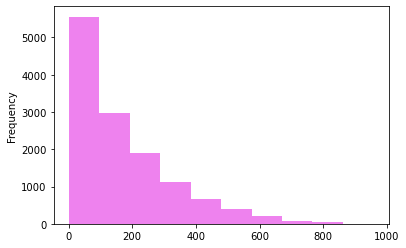

In [12]:
train['count'].plot.hist(color="violet")

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

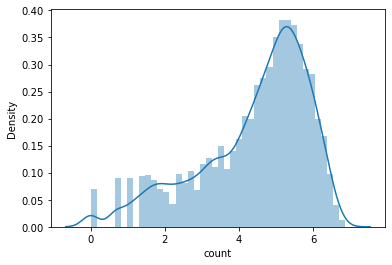

In [13]:
# Taking logarithmic method of variable transformation to reduce right skewedness of the variable and also plotting
np.log(train["count"])
sn.distplot(np.log(train["count"]))

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='registered', ylabel='Density'>

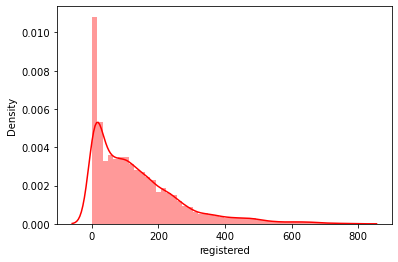

In [14]:
# look at the distribution of registered variable to check the number of registered user rentals initiated
sn.distplot(train["registered"], color="red")

<AxesSubplot:ylabel='Frequency'>

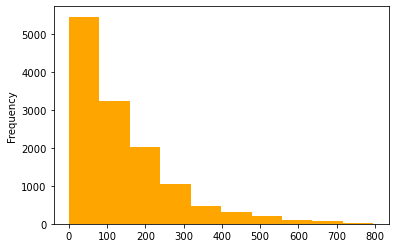

In [15]:
train['registered'].plot.hist(color="orange")

# Bivariate Analysis

In [16]:
## looking at the correlation between numerical variables
# 'season', 'holiday', 'workingday'and 'weather' are basically categorical variables and 'datetime' is string variable, so we will have to drop these columns in order to determine the correlation matrix
corr = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
corr

,temp,atemp,casual,registered,humidity,windspeed,count
temp,1.000000,0.991839,0.459414,0.344451,-0.048478,-0.008669,0.415938
atemp,0.991839,1.000000,0.454015,0.342345,-0.031606,-0.049997,0.412644
casual,0.459414,0.454015,1.000000,0.509175,-0.320253,0.079524,0.707938
registered,0.344451,0.342345,0.509175,1.000000,-0.279501,0.100579,0.968329
humidity,-0.048478,-0.031606,-0.320253,-0.279501,1.000000,-0.296975,-0.322269
windspeed,-0.008669,-0.049997,0.079524,0.100579,-0.296975,1.000000,0.105607
count,0.415938,0.412644,0.707938,0.968329,-0.322269,0.105607,1.000000


In [17]:
#creating numpy array
mask = np.array(corr)
mask

array([[ 1.        ,  0.99183916,  0.4594135 ,  0.34445105, -0.04847786,
        -0.00866888,  0.41593836],
       [ 0.99183916,  1.        ,  0.45401532,  0.34234531, -0.03160613,
        -0.04999706,  0.41264434],
       [ 0.4594135 ,  0.45401532,  1.        ,  0.50917543, -0.32025345,
         0.07952397,  0.70793834],
       [ 0.34445105,  0.34234531,  0.50917543,  1.        , -0.27950085,
         0.1005788 ,  0.96832875],
       [-0.04847786, -0.03160613, -0.32025345, -0.27950085,  1.        ,
        -0.2969754 , -0.32226874],
       [-0.00866888, -0.04999706,  0.07952397,  0.1005788 , -0.2969754 ,
         1.        ,  0.10560659],
       [ 0.41593836,  0.41264434,  0.70793834,  0.96832875, -0.32226874,
         0.10560659,  1.        ]])

<AxesSubplot:>

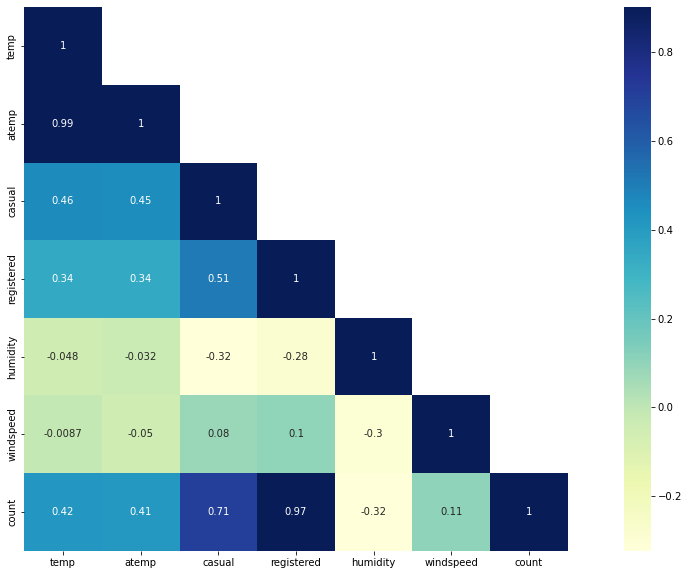

In [18]:
#masked array in which the elements not fulfilling the condition will be "invalid"
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [19]:
# Next we will look for any missing values in the dataset
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [20]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

In [21]:
#checking the data type of the datetime column
type(train['datetime'][0]), type(test['datetime'][0])

(str, str)

In [22]:
#the vlaues in the 'datetime' column are of string type so we have to convert it into datetime format
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(train['datetime'])

In [23]:
#checking the data type of the datetime column
type(train['datetime'][0]), type(test['datetime'][0])

(pandas._libs.tslibs.timestamps.Timestamp,
 pandas._libs.tslibs.timestamps.Timestamp)

In [24]:
#Creating Year, Date, Month, Hour and Day of the week columns for the train dataset
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['date'] = train['datetime'].dt.date
train['hour'] = train['datetime'].dt.hour
train['day of the week'] = train['datetime'].dt.dayofweek

In [25]:
#Creating Year, Date, Month, Hour and Day of the week columns for the test dataset
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['date'] = test['datetime'].dt.date
test['hour'] = test['datetime'].dt.hour
test['day of the week'] = test['datetime'].dt.dayofweek

In [26]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,date,hour,day of the week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16,2011,1,2011-01-01,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40,2011,1,2011-01-01,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32,2011,1,2011-01-01,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13,2011,1,2011-01-01,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1,2011,1,2011-01-01,4,5


In [27]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,date,hour,day of the week
0,2011-01-01 00:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55,2011,1,2011-01-01,0,5
1,2011-01-01 01:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54,2011,1,2011-01-01,1,5
2,2011-01-01 02:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20,2011,1,2011-01-01,2,5
3,2011-01-01 03:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15,2011,1,2011-01-01,3,5
4,2011-01-01 04:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7,2011,1,2011-01-01,4,5


In [28]:
#converting day of the weeks to name of the day
dmap = {0:'Mon', 1:'Tue', 2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
train['day of the week'] = train['day of the week'].map(dmap)
test['day of the week'] = test['day of the week'].map(dmap)

In [29]:
# droppind the datetime column
train.drop('datetime',axis=1,inplace=True)
test.drop('datetime',axis=1,inplace=True)

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12980 entries, 0 to 12979
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           12980 non-null  int64  
 1   holiday          12980 non-null  int64  
 2   workingday       12980 non-null  int64  
 3   weather          12980 non-null  int64  
 4   temp             12980 non-null  float64
 5   atemp            12980 non-null  float64
 6   humidity         12980 non-null  float64
 7   windspeed        12980 non-null  float64
 8   casual           12980 non-null  int64  
 9   registered       12980 non-null  int64  
 10  count            12980 non-null  int64  
 11  year             12980 non-null  int64  
 12  month            12980 non-null  int64  
 13  date             12980 non-null  object 
 14  hour             12980 non-null  int64  
 15  day of the week  12980 non-null  object 
dtypes: float64(4), int64(10), object(2)
memory usage: 1.6+ MB


In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4399 entries, 0 to 4398
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           4399 non-null   int64  
 1   holiday          4399 non-null   int64  
 2   workingday       4399 non-null   int64  
 3   weather          4399 non-null   int64  
 4   temp             4399 non-null   float64
 5   atemp            4399 non-null   float64
 6   humidity         4399 non-null   float64
 7   windspeed        4399 non-null   float64
 8   casual           4399 non-null   int64  
 9   registered       4399 non-null   int64  
 10  year             4399 non-null   int64  
 11  month            4399 non-null   int64  
 12  date             4399 non-null   object 
 13  hour             4399 non-null   int64  
 14  day of the week  4399 non-null   object 
dtypes: float64(4), int64(9), object(2)
memory usage: 515.6+ KB


In [32]:
ymap = {2011:'0',2012:'1'}
train['year'] = train['year'].map(ymap)
test['year'] = test['year'].map(ymap)

In [33]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,date,hour,day of the week
0,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16,0,1,2011-01-01,0,Sat
1,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40,0,1,2011-01-01,1,Sat
2,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32,0,1,2011-01-01,2,Sat
3,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13,0,1,2011-01-01,3,Sat
4,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1,0,1,2011-01-01,4,Sat


In [34]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,date,hour,day of the week
0,3,0,0,3,26.24,28.790,89.0,15.0013,3,55,0,1,2011-01-01,0,Sat
1,3,0,0,2,26.24,28.790,89.0,0.0000,7,54,0,1,2011-01-01,1,Sat
2,3,0,0,2,26.24,28.790,89.0,0.0000,3,20,0,1,2011-01-01,2,Sat
3,3,0,0,2,25.42,27.275,94.0,0.0000,3,15,0,1,2011-01-01,3,Sat
4,3,0,0,1,26.24,28.790,89.0,11.0014,3,7,0,1,2011-01-01,4,Sat


<AxesSubplot:xlabel='hour', ylabel='count'>

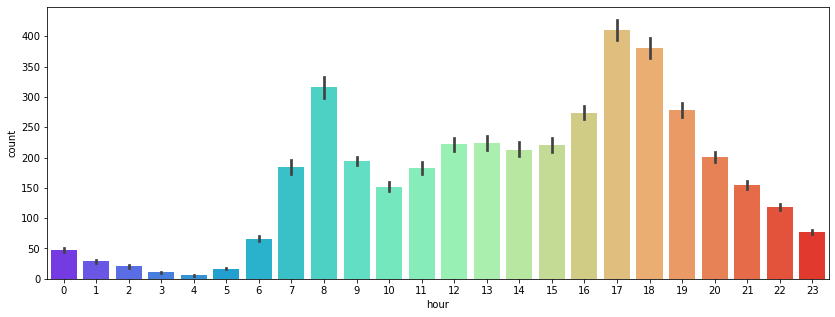

In [35]:
#Demand per hour
plt.figure(figsize = (14,5))
sns.barplot(data=train, x='hour', y='count',palette='rainbow')

<AxesSubplot:xlabel='workingday', ylabel='count'>

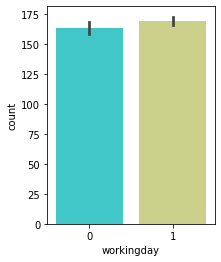

In [36]:
#Demand per working day
plt.figure(figsize = (3,4))
sns.barplot(data=train, x='workingday', y='count',palette='rainbow')

<AxesSubplot:xlabel='day of the week', ylabel='count'>

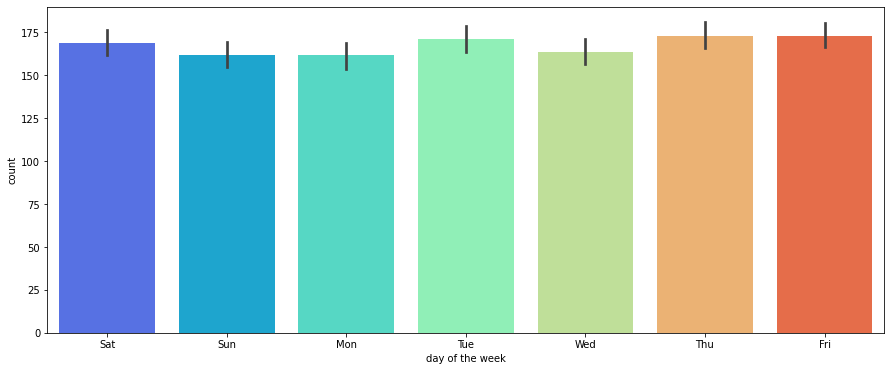

In [37]:
#Demand per day of the week
plt.figure(figsize = (15,6))
sns.barplot(data=train, x='day of the week', y='count',palette='rainbow')

<AxesSubplot:xlabel='month', ylabel='count'>

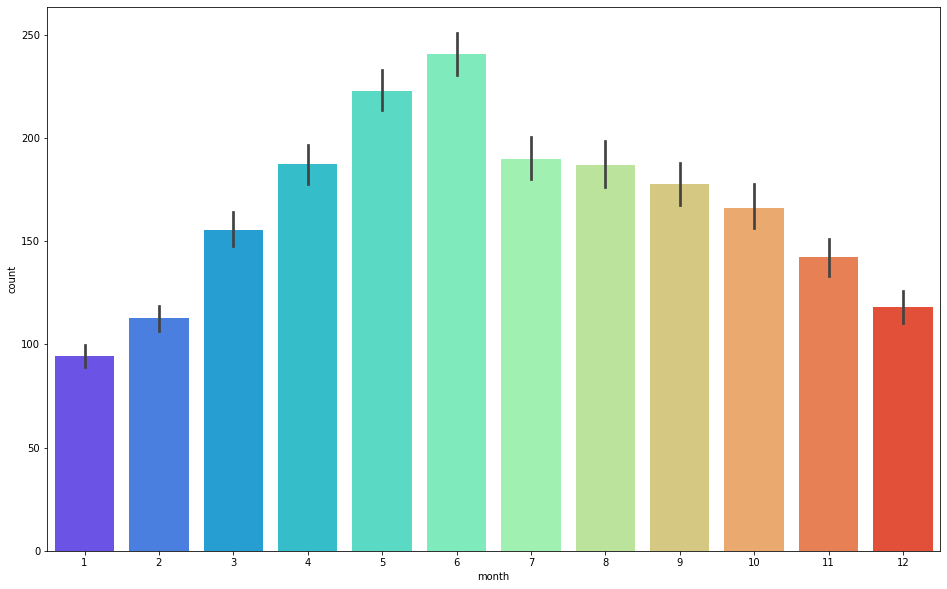

In [38]:
#Demand per month
plt.figure(figsize=(16,10))
sns.barplot(data=train, x='month', y = 'count', palette = 'rainbow')

<AxesSubplot:xlabel='year', ylabel='count'>

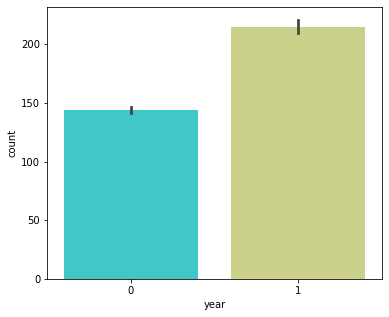

In [39]:
#Demand per year
plt.figure(figsize = (6,5))
sns.barplot(data=train, x='year', y='count',palette='rainbow')

<AxesSubplot:xlabel='workingday', ylabel='count'>

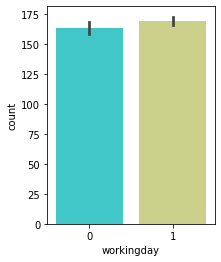

In [40]:
#Demand per working day
plt.figure(figsize = (3,4))
sns.barplot(data=train, x='workingday', y='count',palette='rainbow')

<AxesSubplot:xlabel='holiday', ylabel='count'>

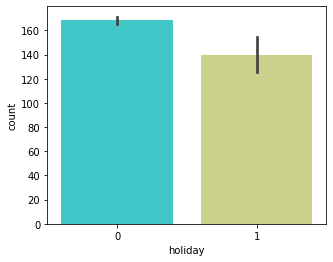

In [41]:
#Demand per holiday
plt.figure(figsize = (5,4))
sns.barplot(data=train, x='holiday', y='count',palette='rainbow')

<AxesSubplot:xlabel='season', ylabel='count'>

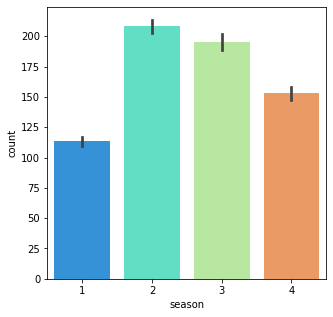

In [42]:
#Demand per season
plt.figure(figsize = (5,5))
sns.barplot(data=train, x='season', y='count',palette='rainbow')

<AxesSubplot:xlabel='weather', ylabel='count'>

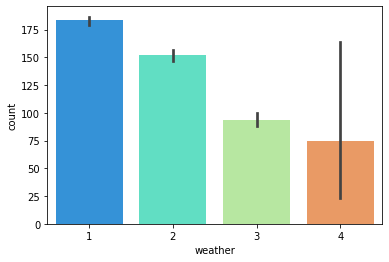

In [43]:
#Demand per weather
plt.figure(figsize = (6,4))
sns.barplot(data=train, x='weather', y='count',palette='rainbow')

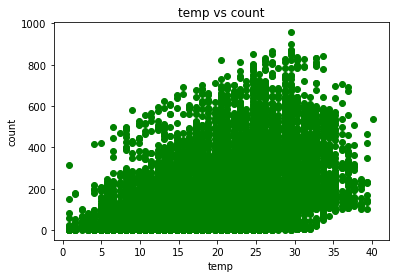

In [44]:
# scatter plot for temp vs demand
plt.scatter(x=train['temp'], y=train['count'], color='green')
plt.xlabel("temp")
plt.ylabel("count")
plt.title("temp vs count")
plt.show()

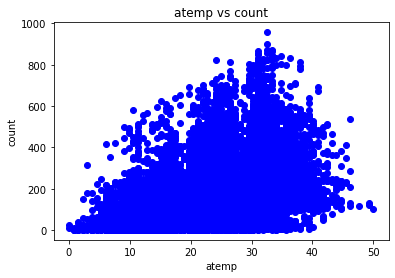

In [45]:
# scatter plot for atemp vs demand
plt.scatter(x=train['atemp'], y=train['count'], color='blue')
plt.xlabel("atemp")
plt.ylabel("count")
plt.title("atemp vs count")
plt.show()

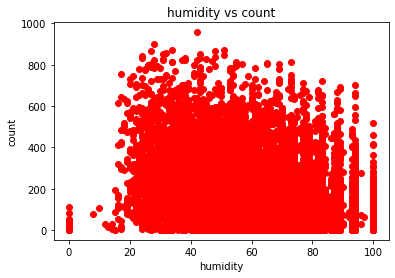

In [46]:
# scatter plot for humidity vs demand
plt.scatter(x=train['humidity'], y=train['count'], color='red')
plt.xlabel("humidity")
plt.ylabel("count")
plt.title("humidity vs count")
plt.show()

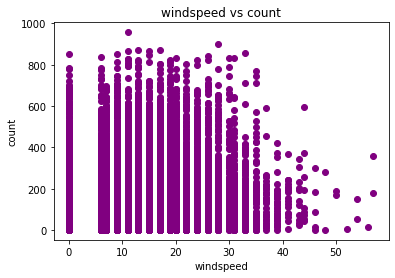

In [47]:
# scatter plot for windspeed vs demand
plt.scatter(x=train['windspeed'], y=train['count'], color='purple')
plt.xlabel("windspeed")
plt.ylabel("count")
plt.title("windspeed vs count")
plt.show()

In [48]:
train.head(4)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,date,hour,day of the week
0,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16,0,1,2011-01-01,0,Sat
1,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40,0,1,2011-01-01,1,Sat
2,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32,0,1,2011-01-01,2,Sat
3,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13,0,1,2011-01-01,3,Sat


In [49]:
# drop the atemp variable as we saw that it is highly correlated with the temp variable
#drop the day of the week, date and year variable as we have already extracted features from this variables
train.drop(['atemp','date','day of the week','year'], axis=1, inplace=True)
test.drop(['atemp','date','day of the week','year'], axis=1, inplace=True)

In [50]:
train.head(7)

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,month,hour
0,1,0,0,1,9.84,81.0,0.0000,3,13,16,1,0
1,1,0,0,1,9.02,80.0,0.0000,8,32,40,1,1
2,1,0,0,1,9.02,80.0,0.0000,5,27,32,1,2
3,1,0,0,1,9.84,75.0,0.0000,3,10,13,1,3
4,1,0,0,1,9.84,75.0,0.0000,0,1,1,1,4
5,1,0,0,2,9.84,75.0,6.0032,0,1,1,1,5
6,1,0,0,1,9.02,80.0,0.0000,2,0,2,1,6


In [51]:
train.tail(7)

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,month,hour
12973,3,0,1,1,39.36,31.0,0.0000,50,414,464,6,18
12974,3,0,1,1,36.90,47.0,12.9980,60,303,363,6,19
12975,3,0,1,1,37.72,42.0,16.9979,53,255,308,6,20
12976,3,0,1,2,35.26,53.0,12.9980,41,195,236,6,21
12977,3,0,1,3,33.62,63.0,12.9980,34,129,163,6,22
12978,3,0,1,3,33.62,63.0,12.9980,6,42,48,6,23
12979,3,0,0,3,26.24,89.0,11.0014,4,65,69,6,0


# Model Building

In [52]:
# applying dummies on the train dataset to change into categorical to numerical
train = pd.get_dummies(train)
train

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,month,hour
0,1,0,0,1,9.84,81.0,0.0000,3,13,16,1,0
1,1,0,0,1,9.02,80.0,0.0000,8,32,40,1,1
2,1,0,0,1,9.02,80.0,0.0000,5,27,32,1,2
3,1,0,0,1,9.84,75.0,0.0000,3,10,13,1,3
4,1,0,0,1,9.84,75.0,0.0000,0,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
12975,3,0,1,1,37.72,42.0,16.9979,53,255,308,6,20
12976,3,0,1,2,35.26,53.0,12.9980,41,195,236,6,21
12977,3,0,1,3,33.62,63.0,12.9980,34,129,163,6,22
12978,3,0,1,3,33.62,63.0,12.9980,6,42,48,6,23


In [53]:
# modeling predicting
X = train.drop('count',axis=1)
y = np.log(train['count'])

In [54]:
X.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,month,hour
0,1,0,0,1,9.84,81.0,0.0,3,13,1,0
1,1,0,0,1,9.02,80.0,0.0,8,32,1,1
2,1,0,0,1,9.02,80.0,0.0,5,27,1,2
3,1,0,0,1,9.84,75.0,0.0,3,10,1,3
4,1,0,0,1,9.84,75.0,0.0,0,1,1,4


In [55]:
#Sklearn train_test_split function splits a dataset into training data and test data
from sklearn.model_selection import train_test_split

In [56]:
# splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 15)

In [57]:
X_train

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,month,hour
3041,2,0,1,1,26.24,41.0,0.0000,48,131,5,15
8173,4,0,1,1,6.56,80.0,0.0000,0,21,12,5
5879,3,0,1,3,24.60,94.0,0.0000,1,9,9,11
10146,1,0,0,1,18.04,30.0,8.9981,28,121,3,20
9166,1,0,0,3,6.56,86.0,11.0014,5,69,1,20
...,...,...,...,...,...,...,...,...,...,...,...
6528,4,0,1,1,23.78,53.0,16.9979,27,156,10,14
2693,2,0,1,2,23.78,88.0,19.0012,3,4,4,3
8076,4,0,1,2,9.84,60.0,31.0009,0,2,12,4
3829,2,0,1,1,27.06,41.0,19.9995,53,106,6,11


In [58]:
X_test

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,month,hour
3539,2,0,1,2,30.34,74.0,15.0013,34,173,6,9
8028,4,0,1,3,18.86,88.0,15.0013,0,7,12,4
9974,1,0,0,1,13.12,29.0,27.9993,21,211,2,15
6375,4,0,1,2,24.60,94.0,0.0000,2,20,9,5
5952,3,0,0,1,30.34,55.0,19.0012,131,239,9,13
...,...,...,...,...,...,...,...,...,...,...,...
11726,2,0,1,2,26.24,69.0,19.0012,59,399,5,19
11509,2,0,0,1,24.60,26.0,19.0012,164,323,4,18
6212,3,0,1,2,24.60,88.0,0.0000,30,103,9,10
12686,2,0,0,1,26.24,53.0,11.0014,146,244,6,19


In [59]:
#contains corresponding levels for x_train
y_train

3041     5.187386
8173     3.044522
5879     2.302585
10146    5.003946
9166     4.304065
           ...   
6528     5.209486
2693     1.945910
8076     0.693147
3829     5.068904
7624     3.713572
Name: count, Length: 10384, dtype: float64

In [60]:
#contains corresponding levels for x_test
y_test

3539     5.332719
8028     1.945910
9974     5.446737
6375     3.091042
5952     5.913503
           ...   
11726    6.126869
11509    6.188264
6212     4.890349
12686    5.966147
915      4.382027
Name: count, Length: 2596, dtype: float64

In [61]:
# checking the shape of X_train, y_train, X_val and y_val
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10384, 11), (10384,), (2596, 11), (2596,))

# LinearRegression

In [62]:
# importing linear regression
from sklearn.linear_model import LinearRegression

In [63]:
# initialize the linear regression model
lreg = LinearRegression()

In [64]:
# fitting the model on X_train and y_train
lreg.fit(X_train,y_train)

LinearRegression()

In [65]:
# making prediction on validation set
prediction = lreg.predict(X_test)
prediction

array([4.57766857, 2.97670456, 5.14159629, ..., 4.0755065 , 6.22889705,
       4.04519267])

In [66]:
# defining a function which will return the rmsle score
def rmsle(y, y_):
    y = np.exp(y),   # taking the exponential as we took the log of target variable
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [67]:
# now calculate the rmsle value of the predictions
rmsle(y_test,prediction)

0.7019113439715978

We got a rmsle value of 0.7019 on the validation set.

Let's use Decision Tree now. Note that rmsle tells us how far the predictions are from the actual value, so we want rmsle value to be as close to 0 as possible. So, we will further try to reduce this value.

# Decision Tree

In [68]:
# importing libraries
from sklearn.tree import DecisionTreeRegressor

In [69]:
# defining a decision tree model with a depth of 4. You can further tune the hyperparameters to improve the score
dt_reg = DecisionTreeRegressor(max_depth=5)

In [70]:
 # fit the decision tree model 
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [71]:
# make prediction on the test set using the trained decision tree model
predict = dt_reg.predict(X_test)
predict

array([5.22749308, 1.84641335, 5.47140138, ..., 4.86511163, 6.22138261,
       4.26433148])

In [72]:
# calculating rmsle of the predicted values
rmsle(y_test, predict)

0.12943638795874754

The rmsle value has decreased to 0.1294. 
This is a decent score. Let's now make predictions for the test dataset.

# now make the prediction on test dataset

In [73]:
# applying dummies on the test dataset to change into categorical to numerical
test = pd.get_dummies(test)
test

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,month,hour
0,3,0,0,3,26.24,89.0,15.0013,3,55,1,0
1,3,0,0,2,26.24,89.0,0.0000,7,54,1,1
2,3,0,0,2,26.24,89.0,0.0000,3,20,1,2
3,3,0,0,2,25.42,94.0,0.0000,3,15,1,3
4,3,0,0,1,26.24,89.0,11.0014,3,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
4394,1,0,1,2,10.66,60.0,11.0014,11,108,7,0
4395,1,0,1,2,10.66,60.0,11.0014,8,81,7,1
4396,1,0,1,1,10.66,60.0,11.0014,7,83,7,2
4397,1,0,1,1,10.66,56.0,8.9981,13,48,7,3


In [74]:
test_prediction = dt_reg.predict(test)
test_prediction

array([4.26433148, 4.26433148, 3.09967485, ..., 4.61357652, 4.18342426,
       3.75104797])

In [75]:
# These are the log values and we have to convert them back to the original scale
final_prediction = np.exp(test_prediction)

In [76]:
#saving the test prediction
submission = pd.DataFrame()

In [77]:
# creating a count column and saving the predictions in it
submission['count'] = final_prediction

In [78]:
#DataFrame to CSV with removing index and having column header with csv file name as RESULT
submission.to_csv('submissionNEW.csv', header=True, index=False)